In [123]:
#!pip install yfinance
#!pip install pmdarima
#!pip install statsmodels

In [124]:
# import statements
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from statsmodels.tsa.arima.model import ARIMA

from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [125]:
# crypto data
# Bitcoin
df = yf.download('BTC-USD')

[*********************100%%**********************]  1 of 1 completed


In [126]:
# General observations on df
df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2014-09-17,465.864014,468.174011,452.421997,457.334015,457.334015,21056800
2014-09-18,456.859985,456.859985,413.104004,424.440002,424.440002,34483200
2014-09-19,424.102997,427.834991,384.532013,394.795990,394.795990,37919700
2014-09-20,394.673004,423.295990,389.882996,408.903992,408.903992,36863600
2014-09-21,408.084991,412.425995,393.181000,398.821014,398.821014,26580100
...,...,...,...,...,...,...
2024-07-09,56704.597656,58239.195312,56316.875000,58009.226562,58009.226562,27849512607
2024-07-10,58033.882812,59359.433594,57178.414062,57742.496094,57742.496094,26175260526
2024-07-11,57729.890625,59299.433594,57120.378906,57344.914062,57344.914062,28707803842


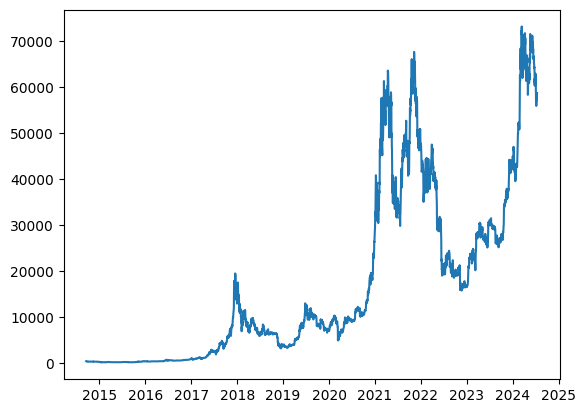

In [127]:
# Plot adjsuted closing price
plt.plot(df.index, df['Adj Close'])

In [128]:
# split test and training data
r = int(len(df)*0.9)

train = list(df[0:r]['Adj Close'])
test = list(df[r:]['Adj Close'])

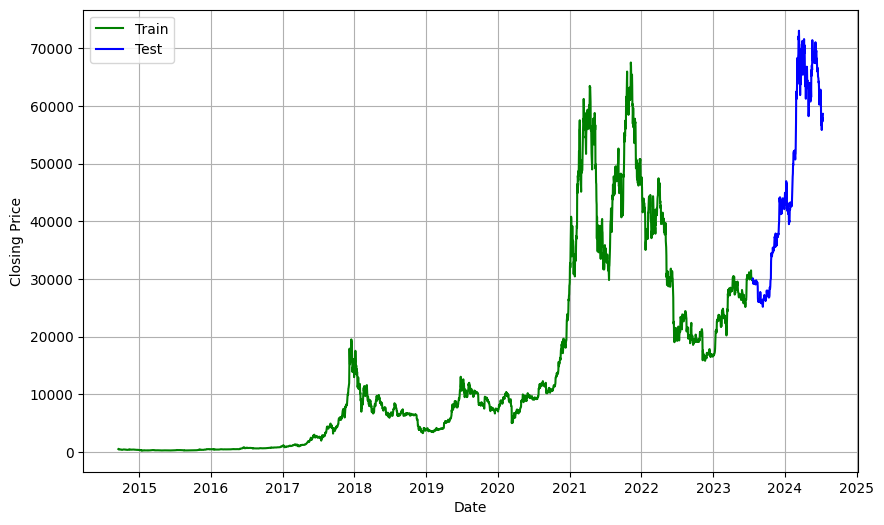

In [129]:
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.plot(df[0:r]['Adj Close'], 'green', label = 'Train')
plt.plot(df[r:]['Adj Close'], 'blue', label = 'Test')
plt.legend()

In [130]:
predictions = []
num_of_test = len(test)

In [131]:
for i in range(num_of_test):
  model = ARIMA(train, order = (4,1,0))
  fitted_model = model.fit()
  output = fitted_model.forecast()
  yhat= output[0]
  predictions.append(yhat)
  test_val = test[i]
  train.append(test_val)

  #print(output[0])
  #break


In [132]:
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 3587
Model:                 ARIMA(4, 1, 0)   Log Likelihood              -29309.467
Date:                Sat, 13 Jul 2024   AIC                          58628.935
Time:                        17:09:41   BIC                          58659.859
Sample:                             0   HQIC                         58639.958
                               - 3587                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0547      0.008     -6.555      0.000      -0.071      -0.038
ar.L2          0.0099      0.009      1.120      0.263      -0.007       0.027
ar.L3          0.0318      0.009      3.367      0.001       0.013       0.050
ar.L4          0.0351      0.008      4.361      0.000       0.019       0.051
sigma2      7.366e+05   6301.823    116.892      0.000    7.24e+05    7.49e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             28012.75
Prob(Q):                              0.97   Prob(JB):                         0.00
Heteroskedasticity (H):              40.11   Skew:                            -0.04
Prob(H) (two-sided):                  0.00   Kurtosis:                        16.69
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [133]:
len(test)

359

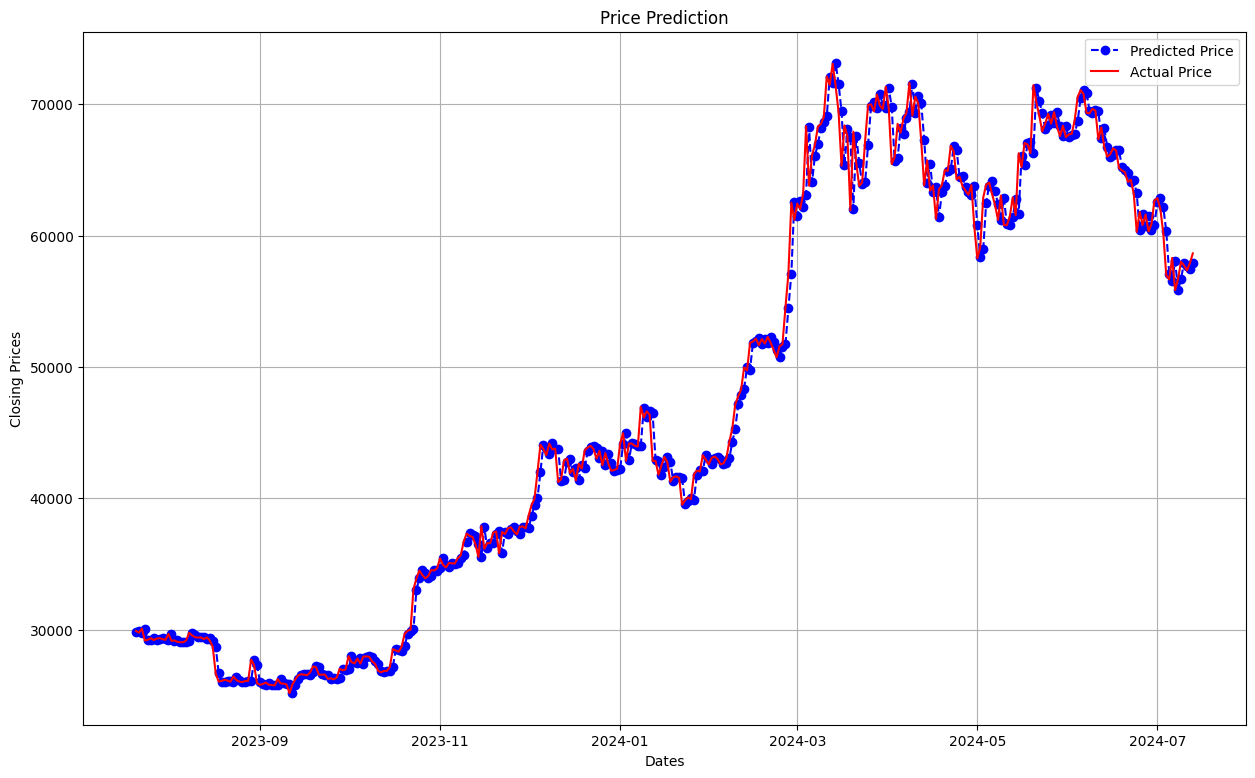

In [134]:
plt.figure(figsize=(15,9))
plt.grid(True)

range =df[r:].index

plt.plot(range, predictions, color='blue', marker='o', linestyle='dashed', label='Predicted Price')
plt.plot(range, test, color='red', label='Actual Price')

plt.title('Price Prediction')
plt.xlabel('Dates')
plt.ylabel('Closing Prices')
plt.legend()
plt.show()

In [135]:
# Mean Average Percent Error
mean_avg_per_error = np.mean(np.abs(np.array(predictions) - np.array(test))/np.abs(test))
print(str(mean_avg_per_error))

0.01715811592447154
